# Paths

In [1]:
path = '/home/chayan/NeuroGDAVIS/'
res_plots = path + 'Results/Plots/'
res_model = path + 'Results/Models/'
path_emb = path + 'Data/Embeddings/'

# Importing libraries

In [2]:
import sys
sys.path.append(path)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
import ipynbname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import Datasets as ds
from keras.models import load_model
from utils import DownstreamAnalysis as DA

dataname = ipynbname.name().rsplit("_")[0]
txt = %pwd
methodname = txt.rsplit("/")[-1]

# Load Models

In [3]:
y = ds.LoadData(dataname, DType='None', LType=True)
x_embedding = np.array(pd.read_csv(path_emb+dataname+'/'+dataname+'_'+methodname+'.csv', index_col=0, header=0))
model_decoder = load_model(res_model+dataname+'/'+dataname+'_'+methodname+'_decoder', compile=False)

# Plots

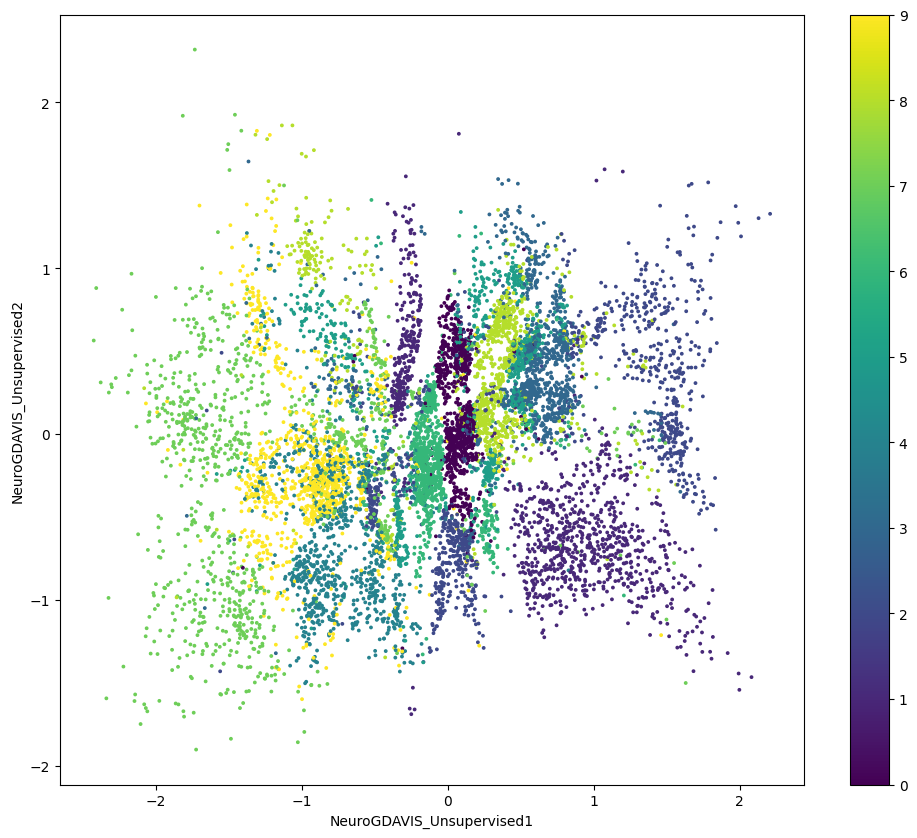

In [4]:
plt.figure(figsize=(12, 10))
plt.scatter(x_embedding[:, 0], x_embedding[:, 1], c=y, s=3)
plt.colorbar()
plt.xlabel(methodname+"1")
plt.ylabel(methodname+"2")
newpath = res_plots+dataname+'/'
if not os.path.exists(newpath):
    os.makedirs(newpath)
plt.savefig(newpath+dataname+'_'+methodname+'_embedding.pdf')
plt.show()

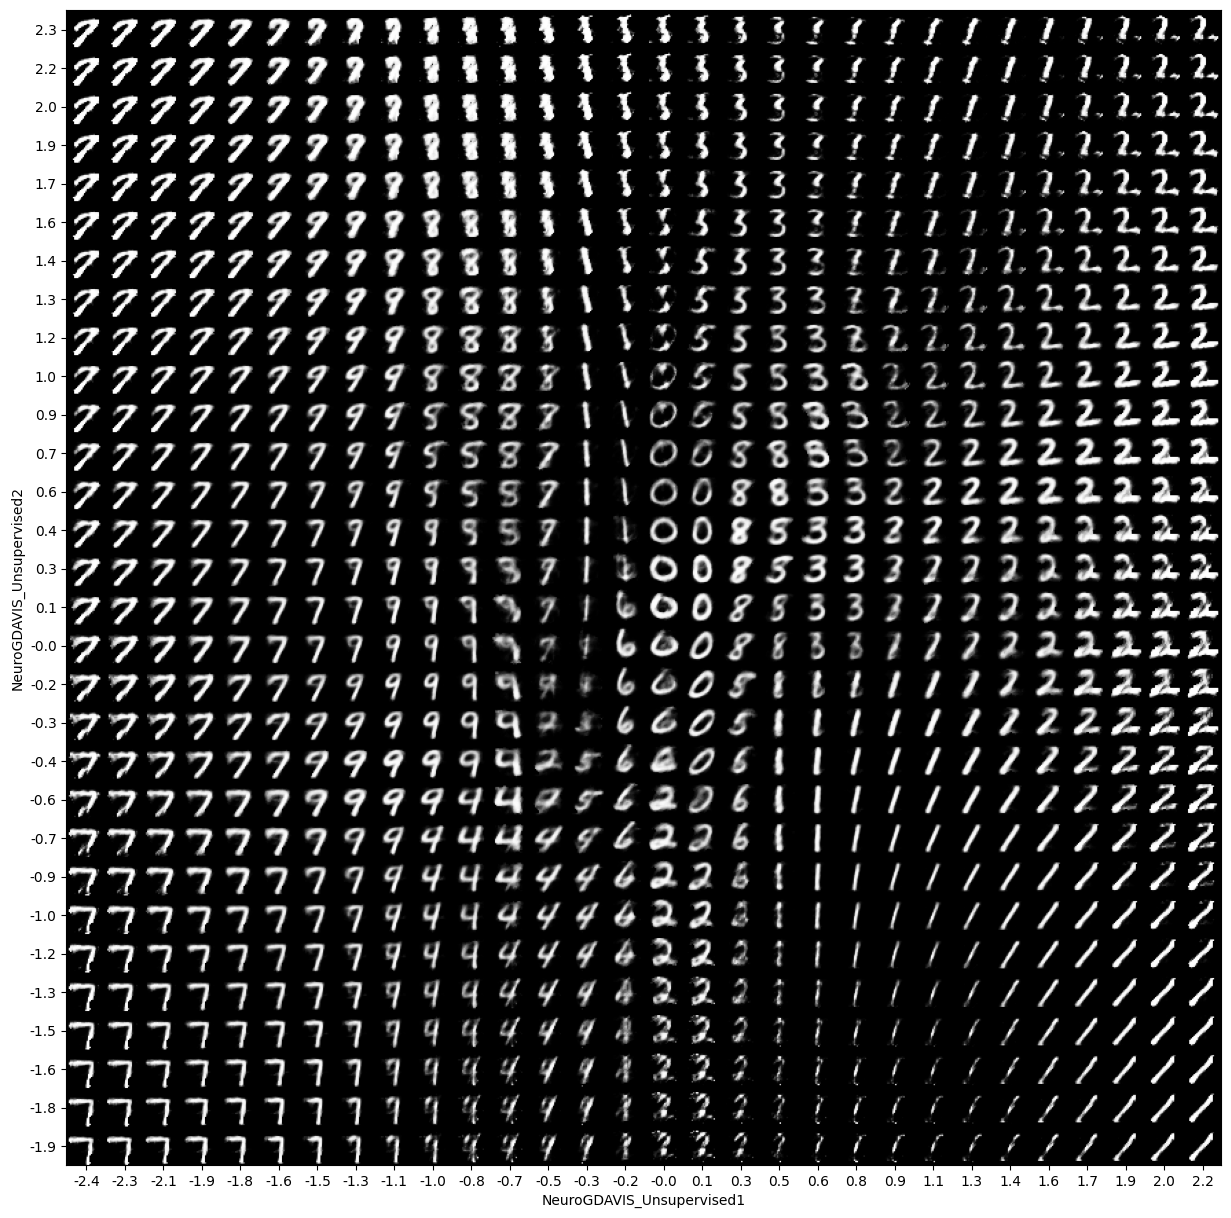

In [5]:
DA.plot_latent_space(model_decoder, x_embedding=x_embedding, digit_size = 28, dataname=dataname,
                      methodname=methodname, res_plots=res_plots)

1/1 [==============================] - 0s 34ms/step


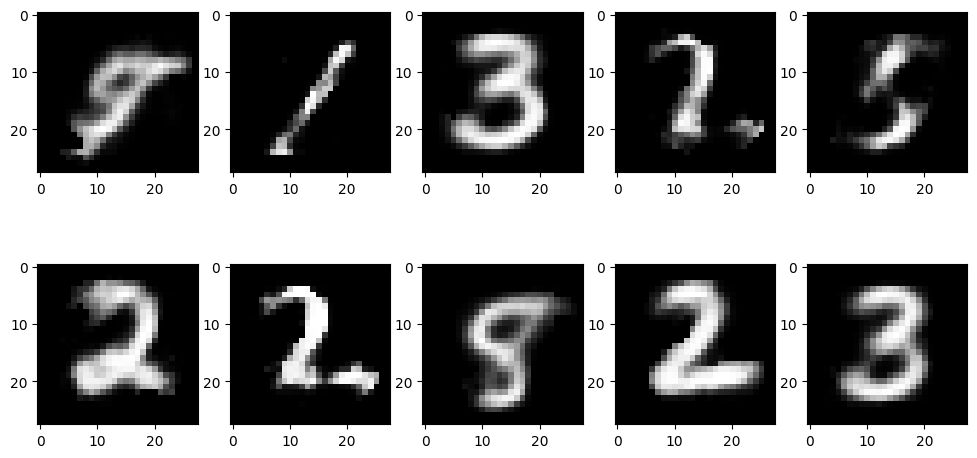

In [6]:
DA.generate(model_decoder, x_embedding, dataname=dataname, methodname=methodname, res_plots=res_plots)